In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import mpl_finance
from scipy import stats
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = glob.glob('./data/2017/*.txt')

col_names = ['code', 'name', 'open', 'high', 'low', 'close', 'volume']

# get code list
df_code = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
codes = df_code.iloc[1:, 0].as_matrix()

for path in tqdm(paths[1:]):

    df_code = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    codes = list(set(codes) & set(df_code.iloc[1:, 0].as_matrix()))
    
# code filtering
codes = np.array(codes)[np.array(codes) > 1700]

# get price data
df_all = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
date = str(df_all.iloc[0, 0])
date = date[:4] + '-' + date[4:6] + '-' + date[6:]
df_all['date'] = date
df_all = df_all.iloc[1:, :]
df_all = df_all[df_all['code'].isin(codes)]

for path in tqdm(paths[1:]):
    
    df = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    date = str(df.iloc[0, 0])
    date = date[:4] + '-' + date[4:6] + '-' + date[6:]
    df['date'] = date
    df = df.iloc[1:, :]
    df = df[df['code'].isin(codes)]
    df_all = pd.concat([df_all, df])

df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by=['code', 'date'], ascending=True)
print(len(df_all))

100%|██████████| 246/246 [00:14<00:00, 16.91it/s]


715806


In [3]:
c = 7203

start_date = '2017-01-01'
end_date = '2017-06-30'

* bollinger band
    * http://www.procrasist.com/entry/14-technical-analysis
    * http://blog.engineer.adways.net/entry/2017/10/06/150000

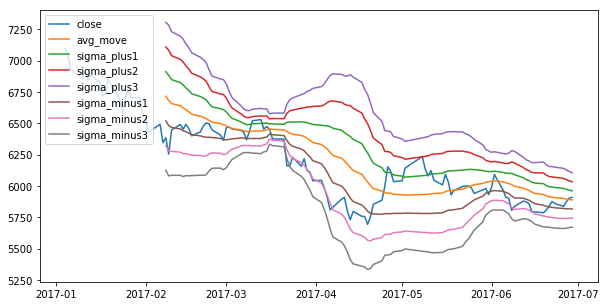

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False], dtype=bool),
 array([False, False

In [4]:
# ボリンジャーバンド

df_tmp = df_all[df_all['code'] == c]
df_tmp = df_tmp[(start_date < df_tmp['date']) & (df_tmp['date'] < end_date)]

period = 25

avg_move = df_tmp['close'].rolling(period).mean().values
sigma = df_tmp['close'].rolling(period).std(ddof=0).values
sigma_plus1 = avg_move+sigma
sigma_plus2 = avg_move+sigma*2
sigma_plus3 = avg_move+sigma*3
sigma_minus1 = avg_move-sigma
sigma_minus2 = avg_move-sigma*2
sigma_minus3 = avg_move-sigma*3

plt.figure(figsize=(10, 5))
plt.plot(df_tmp['date'], df_tmp['close'])
plt.plot(df_tmp['date'], avg_move, label='avg_move')
plt.plot(df_tmp['date'], sigma_plus1, label='sigma_plus1')
plt.plot(df_tmp['date'], sigma_plus2, label='sigma_plus2')
plt.plot(df_tmp['date'], sigma_plus3, label='sigma_plus3')
plt.plot(df_tmp['date'], sigma_minus1, label='sigma_minus1')
plt.plot(df_tmp['date'], sigma_minus2, label='sigma_minus2')
plt.plot(df_tmp['date'], sigma_minus3, label='sigma_minus3')
plt.legend(loc=2)
plt.show()

np.array(df_tmp['close'] > sigma_plus2), np.array(df_tmp['close'] < sigma_minus2)